In [0]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=f185338c55acf7078e6aefd0a5c884b1c22af1c54e560a1b4a64d4ed43a83523
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-bprdbzx_
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-bprdbzx_
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [0]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 568kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post200513-cp36-none-any.whl size=40893 sha256=bd44df34629d0b6bb4ac083cc2e8ffee40b924b49cd640c2b72dea90c5926245
  Stored in directory: /root/.cache/pip/wheels/a2/f6/77/551770c4b8cd75e9335cd0acf59c08d60a8684048b19da6702
Successfully built fvcore


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import pandas as pd
import json
import os
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog  
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog



In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_path = os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Colab Notebooks', 'dataset')
# data paths
# train_path = os.path.join(data_path, 'train') 
# test_path = os.path.join(data_path, 'test')
# val_path = os.path.join(data_path, 'validation')

train_path = os.path.join(data_path, 'train_small') 
test_path = os.path.join(data_path, 'test_small')
val_path = os.path.join(data_path, 'validation_small')

# label files
# with open(os.path.join(data_path, 'train.json')) as f:
#     train_labels = json.load(f)
# with open(os.path.join(data_path, 'test.json')) as f:
#     test_labels = json.load(f)
# with open(os.path.join(data_path, 'val.json')) as f:
#     val_labels = json.load(f)

with open(os.path.join(data_path, 'train_small.json')) as f:
    train_labels = json.load(f)
with open(os.path.join(data_path, 'test_small.json')) as f:
    test_labels = json.load(f)
with open(os.path.join(data_path, 'val_small.json')) as f:
    val_labels = json.load(f)

In [0]:
# need to change image path and set bbox_mode to 
for ind, elem in enumerate(train_labels):
    train_labels[ind]['file_name'] = os.path.join(train_path, train_labels[ind]['image_id'] + '.jpg')
    for ind2, elem2 in enumerate(train_labels[ind]['annotations']):
        train_labels[ind]['annotations'][ind2]['bbox_mode'] = BoxMode.XYXY_ABS

for ind, elem in enumerate(test_labels):
    test_labels[ind]['file_name'] = os.path.join(test_path, test_labels[ind]['image_id'] + '.jpg')
    for ind2, elem2 in enumerate(test_labels[ind]['annotations']):
        test_labels[ind]['annotations'][ind2]['bbox_mode'] = BoxMode.XYXY_ABS
  
for ind, elem in enumerate(val_labels):
    val_labels[ind]['file_name'] = os.path.join(val_path, val_labels[ind]['image_id'] + '.jpg')
    for ind2, elem2 in enumerate(val_labels[ind]['annotations']):
        val_labels[ind]['annotations'][ind2]['bbox_mode'] = BoxMode.XYXY_ABS

In [0]:
val_labels[0] # detectron2 style labels

{'annotations': [{'bbox': [107.051008,
    173.038848,
    899.9751679999999,
    660.432384],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 2}],
 'file_name': '/content/gdrive/My Drive/Colab Notebooks/dataset/validation_small/01bef5827cab386c.jpg',
 'height': 768,
 'image_id': '01bef5827cab386c',
 'width': 1024}

In [0]:
# returns dataset
def get_data_dicts(d):
    if d == 'train':
        return train_labels
    elif d == 'val':
        return val_labels
    elif d == 'test':
        return test_labels

# register dataset
for d in ["train", "val", "test"]:
    DatasetCatalog.register("data_" + d, lambda d=d: get_data_dicts(d))

    # large dataset
    # MetadataCatalog.get("data_" + d).set(thing_classes=['Bathtub', 'Bed', 'Billiard table', 'Ceiling fan', 'Coffeemaker', 'Couch',
    #                                                     'Countertop', 'Dishwasher', 'Fireplace', 'Fountain', 'Gas stove', 'Jacuzzi',
    #                                                     'Kitchen & dining room table', 'Microwave oven', 'Mirror', 'Oven', 'Pillow',
    #                                                     'Porch', 'Refrigerator', 'Shower', 'Sink', 'Sofa bed', 'Stairs', 'Swimming pool',
    #                                                     'Television', 'Toilet', 'Towel', 'Tree house', 'Washing machine', 'Wine rack'])
    
    # small dataset
    MetadataCatalog.get("data_" + d).set(thing_classes=['Bathtub', 'Coffeemaker', 'Gas Stove'])

data_metadata = MetadataCatalog.get("data_train")

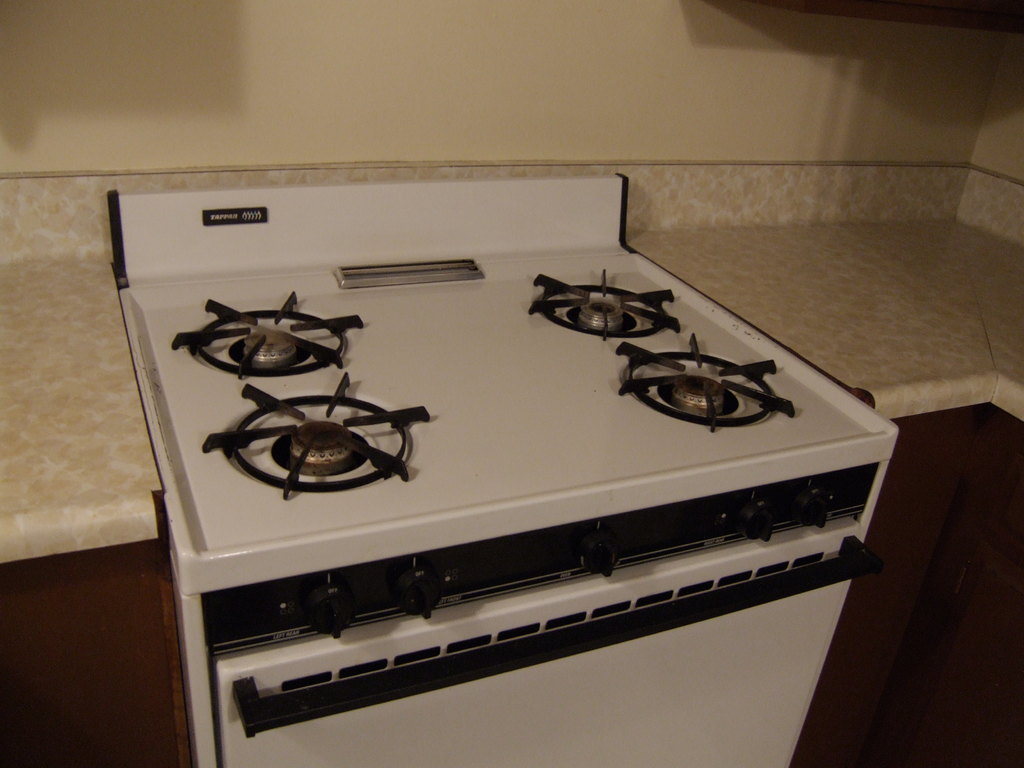

In [0]:
im = cv2.imread(os.path.join(val_path, os.listdir(val_path)[0]))
cv2_imshow(im)

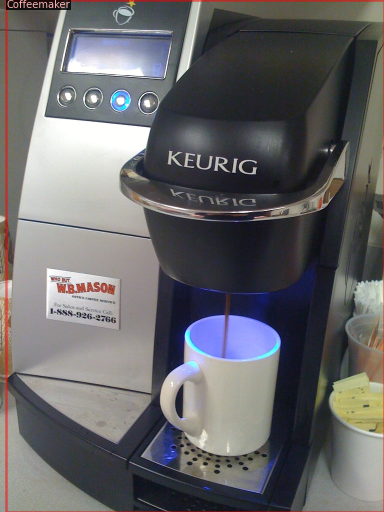

In [0]:
img = cv2.imread(os.path.join(val_path, os.listdir(val_path)[3]))
visualizer = Visualizer(img[:, :, ::-1], metadata=data_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(val_labels[3])
cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
val_labels[5]

{'annotations': [{'bbox': [0.1536, 0.0, 760.109056, 678.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 1}],
 'file_name': '/content/gdrive/My Drive/Colab Notebooks/dataset/validation_small/2540d6d0d881c2ba.jpg',
 'height': 678,
 'image_id': '2540d6d0d881c2ba',
 'width': 1024}

In [0]:
def visualize(image_path):
    img = cv2.imread(image_path)
    visualizer = Visualizer(img[:, :, ::-1], metadata=data_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(val_labels[5])
    cv2_imshow(vis.get_image()[:, :, ::-1])

**Training Model**

In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.OUTPUT_DIR = os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Colab Notebooks', 'output')
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("data_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()
#It will train about 20 minutes in colab.

[05/21 20:20:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (4, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (4,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (12, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (12,) in the model! Skipped.


[05/21 20:20:39 d2.engine.train_loop]: Starting training from iteration 0
[05/21 20:20:48 d2.utils.events]:  eta: 0:14:26  iter: 19  total_loss: 1.321  loss_cls: 1.196  loss_box_reg: 0.084  loss_rpn_cls: 0.023  loss_rpn_loc: 0.009  time: 0.4022  data_time: 0.2507  lr: 0.000005  max_mem: 2728M
[05/21 20:20:58 d2.utils.events]:  eta: 0:15:17  iter: 39  total_loss: 1.211  loss_cls: 1.082  loss_box_reg: 0.089  loss_rpn_cls: 0.014  loss_rpn_loc: 0.016  time: 0.4393  data_time: 0.2766  lr: 0.000010  max_mem: 2728M
[05/21 20:21:06 d2.utils.events]:  eta: 0:15:15  iter: 59  total_loss: 1.015  loss_cls: 0.864  loss_box_reg: 0.089  loss_rpn_cls: 0.027  loss_rpn_loc: 0.010  time: 0.4416  data_time: 0.2428  lr: 0.000015  max_mem: 2728M
[05/21 20:21:14 d2.utils.events]:  eta: 0:15:04  iter: 79  total_loss: 0.791  loss_cls: 0.646  loss_box_reg: 0.086  loss_rpn_cls: 0.020  loss_rpn_loc: 0.009  time: 0.4249  data_time: 0.1818  lr: 0.000020  max_mem: 2728M
[05/21 20:21:22 d2.utils.events]:  eta: 0:14:5

In [0]:
# # Look at training curves in tensorboard:
# %load_ext tensorboard
# %tensorboard --logdir output

**Inference**

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("data_val", )
predictor = DefaultPredictor(cfg)

In [0]:
val_labels[0]

{'annotations': [{'bbox': [107.051008,
    173.038848,
    899.9751679999999,
    660.432384],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 2}],
 'file_name': '/content/gdrive/My Drive/Colab Notebooks/dataset/validation_small/01bef5827cab386c.jpg',
 'height': 768,
 'image_id': '01bef5827cab386c',
 'width': 1024}

In [0]:
im = cv2.imread(val_labels[0]['file_name'])
outputs = predictor(im)
outputs

{'instances': Instances(num_instances=1, image_height=768, image_width=1024, fields=[pred_boxes: Boxes(tensor([[109.4797, 222.1555, 904.5361, 603.0082]], device='cuda:0')), scores: tensor([0.9803], device='cuda:0'), pred_classes: tensor([2], device='cuda:0')])}

In [0]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_data_dicts("val")

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im,
                   metadata=data_metadata, 
                   scale=0.8,
                   instance_mode =  ColorMode.IMAGE
        )
                   # remove the colors of unsegmented pixels
    print(outputs['instances'].pred_classes)
    print(outputs["instances"].pred_boxes)

    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image())

In [0]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("data_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "data_val")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [05/21 20:45:48 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'data_val'. Trying to convert it to COCO format ...
[05/21 20:45:48 d2.data.datasets.coco]: Converting annotations of dataset 'data_val' to COCO format ...)
[05/21 20:45:48 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[05/21 20:45:48 d2.data.datasets.coco]: Conversion finished, #images: 48, #annotations: 50
[05/21 20:45:48 d2.data.datasets.coco]: Caching COCO format annotations at './output/data_val_coco_format.json' ...
[05/21 20:45:48 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category   | #instances   |  category  | #instances   |
|:----------:|:-------------|:-----------:|:-------------|:----------:|:-------------|
|  Bathtub   | 15           | Coffeemaker | 18           | Gas Stove  | 17           |
|            |              |             |              |            |              |
|   total    | 50    

OrderedDict([('bbox',
              {'AP': 48.12638814680757,
               'AP-Bathtub': 50.66123744242555,
               'AP-Coffeemaker': 61.37058210396214,
               'AP-Gas Stove': 32.34734489403502,
               'AP50': 76.9671286379376,
               'AP75': 51.238209781995245,
               'APl': 48.25702918910545,
               'APm': nan,
               'APs': nan})])